**************************
## Multiple Linear Regression ##
**************************

**Formula of Mutiple Linear Regression for Population**
<br>
----
$ y = b0 + b1 * x1 + b2 * x2 + ----- + bk * xk + e $
<br>
* y is the dependent variable <br>
* x1--xk are the independent variables <br>
* b0 is the constant <br>
* b1 -- b2 are the coefficients  - quantifies the effect of independent variables <br>
* e is the error ( on avearage error is 0)+ e $ <br> 
<br>


## Mutiple Regression is anout best fitting model ##
<br>
We want least sum of squared errors(SSE)<br>
<br>
<ins>Sum of Squares Errors (SSE) Also called as Residual Sum of Squares (RSS)</ins><br>
1. It is the differences between the observed value and the predicted value<br>
2.  We usually want to  minimize the value <br>
3.  The smaller the error better the estimation power of the regression<br>


## Adjusted R-Squared ##
1. R-Squared measures how much of the total variability is explained by our model <br>
2. Multiple regressions are always better than simple ones as with each additional variable<br>
you add the explanatory power may increase or stay the same.

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.api as sm
sns.set()

In [2]:
data = pd.read_csv("/Users/amrutaabhyankar/Downloads/1.02.+Multiple+linear+regression.csv")

In [3]:
data

,SAT,GPA,"Rand 1,2,3"
0,1714,2.40,1
1,1664,2.52,3
2,1760,2.54,3
3,1685,2.74,3
4,1693,2.83,2
...,...,...,...
79,1936,3.71,3
80,1810,3.71,1
81,1987,3.73,3
82,1962,3.76,1


In [4]:
data.describe()

,SAT,GPA,"Rand 1,2,3"
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,2.059524
std,104.530661,0.271617,0.855192
min,1634.000000,2.400000,1.000000
25%,1772.000000,3.190000,1.000000
50%,1846.000000,3.380000,2.000000
75%,1934.000000,3.502500,3.000000
max,2050.000000,3.810000,3.000000


## Create Multiple Regression ## 

Defining the dependent and independent variable

In [5]:
y = data["GPA"]
x1 = data[["SAT", "Rand 1,2,3"]]

Regression Itself

In [6]:
x = sm.add_constant(x1)
x

,const,SAT,"Rand 1,2,3"
0,1.0,1714,1
1,1.0,1664,3
2,1.0,1760,3
3,1.0,1685,3
4,1.0,1693,2
...,...,...,...
79,1.0,1936,3
80,1.0,1810,1
81,1.0,1987,3
82,1.0,1962,1


In [7]:
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     27.76
Date:                Sat, 30 Jan 2021   Prob (F-statistic):           6.58e-10
Time:                        18:53:58   Log-Likelihood:                 12.720
No. Observations:                  84   AIC:                            -19.44
Df Residuals:                      81   BIC:                            -12.15
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2960      0.417      0.710      0.480      -0.533       1.125
SAT            0.0017      0.000      7.432      0.000       0.001       0.002
Rand 1,2,3    -0.0083      0.027     -0.304      0.762      -0.062       0.046
==============================================================================
Omnibus:                       12.992   Durbin-Watson:                   0.948
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.364
Skew:                          -0.731   Prob(JB):                     0.000280
Kurtosis:                       4.594   Cond. No.                     3.33e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

---
**Adjusted R-Squared is 3.92** <br>
* We were penalized for adding an additional variable that had no strong explanatory power!<br>
* We have added information but lost value <br>
* The p-value of the 'Rand 1,2,3' variable is 0.762, we cannot reject the null hypothesis at 76.2% significance level <br> 
* This is incredibly high p-value, We want a p-value which is less than 0.05


**Conclusion** <br>
The variable 'Rand 1,2,3' not only worsens the explanatory power
but is also insignificant. Therefore this variable should be dropped !

---
## F-Statistics ##
<br>
* The F-statistic is used for testing the overall significance of the model.<br>
* The Null Hypothesis is that all betas are zero simultaneously <br>
* The Alternate hypothesis is that atleast one beta deiifers from zero<br>
* The lower the F-statistics, the closer to a non-significant model


---
## OLS Assumptions ##
1. Linearity
2. No endogenity 
3. Normality and Homoscedasticity
4. No autocorrelation
5. No multiconllinearity

---

## 1. Linearity ##
* Linear Regression is the simplest non-trivial realtionship. <br>
* $ y = b0 + b1 * x1 + b2 * x2 + ----- + bk * xk + e $ <br>
* If the data points form a pattern that looks like a straight line then a linear regression model is suitable. <br>


---
## 2.  No Endogenity ##
* Prohibition of link between the independent variable and the errors mathematically expressed in the following way.  e*<br>
* Omitted variable bias is introduced in the model when you forget to include a relevant variable as each independent variable explains why the move together and are some what correlated. <br>
* Similarly Y is also explained by the omitted variable so they are correlated. <br>
* Chances are that th eomitted variable is also correlated with atleast one independent X. <br>
* Everything that you don't explain with model goes into the error . <br>
* So actually the error becomes correlated with eveything else. <br>

#### Omitted Variable Bias ####
* Where did we draw th esample from ? <br>
* Can we get a better sample ? <br>
* Always different, always sneaky an donly an dadvanced knowledge on the subject can help always check for it.


---
## 3. Normality and Homoscedasticity ##
* Normality: <br>
 - We assume the error term is normally distributed. <br>
 - The central limit thearem applies for the error terms too, therefore we can consider as normality as given to us <br>
* Zero mean: <br>
 - If the mean is not expected to be zero then the line is not best fitting one. <br>
 - However having an intercept solves that problem. <br>
 - So in real life it is unusual to violate this part of the assumption <br>
* Homoscedasticity: <br>
 - It means to have equal variance, So the error term should have equal variance with one with the other. <br>
 - What if there is pattern in the variance, i.e. the variance the error is less smaller values but the variance of error is large when dealing with larger values <br>
 
 #### Prevention ####
 * Look for OVB (Omitted Variable Bias).<br>
 * Look for outliers. <br>
 * Transform <br>
 - Log Transformation: <br>
   *  Take the log of variable. <br>
   * Create a regression between the log of Y and independent X's. <br>
 - Log-Log Transformation: Sometimes we need to change both scales to log. <br>
   

---
## 4. No Auto Correlation a.k.a No Serial Correlation ##
* Errors are assumed to be uncorrelated <br>
 - We can observe serial correlation in the time series data , like stock prices. <br>
* Detection of auto correlation
 - A common way is to plot all the residual(erros) on a graph and look for patterns. If you cannot find any patterns      you are safe. <br>
 - Another is the Derbain Watson test which you have in the summary for the table provided by stat's models. 
   <br> - Generally its values fall between 0 and 4. <br> - 2 indicates no autocorrealation <br> - Values below 1 and above 3 are a cause for alarm.
   
### No Remedy ###
 * When in presence of auto correlation avoid linear regression model.
 

---
## 5. No Multicollinearity ##
* We observe multi-collinearity when two or more variables have high correlation. <br>

#### Fixes  ####
1. Drop one of two variables.
2. Transform them into one variable (e.g. average price).
3. Keep them both ( but with caution!)

#### Prevention  ####
* Find the correlation between each pair of the independent variables.

----
# Dealing with Categorical Data - Dumy Variables #
* Dummy is a variable used to include categorical data into a regression model.



In [9]:
raw_data = pd.read_csv("/Users/amrutaabhyankar/Downloads/1.03.+Dummies.csv")

In [10]:
raw_data

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
...,...,...,...
79,1936,3.71,Yes
80,1810,3.71,Yes
81,1987,3.73,No
82,1962,3.76,Yes


In [11]:
data = raw_data.copy()

In [12]:
data["Attendence"] = data["Attendance"].map({'Yes':1,'No':0})

In [13]:
data

,SAT,GPA,Attendance,Attendence
0,1714,2.40,No,0
1,1664,2.52,No,0
2,1760,2.54,No,0
3,1685,2.74,No,0
4,1693,2.83,No,0
...,...,...,...,...
79,1936,3.71,Yes,1
80,1810,3.71,Yes,1
81,1987,3.73,No,0
82,1962,3.76,Yes,1


In [14]:
data.describe()

,SAT,GPA,Attendence
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


In [15]:
y = data["GPA"]
x1 = data[["SAT","Attendence"]]

In [16]:
x = sm.add_constant(x1)

In [17]:
x

,const,SAT,Attendence
0,1.0,1714,0
1,1.0,1664,0
2,1.0,1760,0
3,1.0,1685,0
4,1.0,1693,0
...,...,...,...
79,1.0,1936,1
80,1.0,1810,1
81,1.0,1987,0
82,1.0,1962,1


In [19]:
results = sm.OLS(y,x).fit()

In [20]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Sat, 30 Jan 2021   Prob (F-statistic):           2.19e-15
Time:                        19:08:40   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendence     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

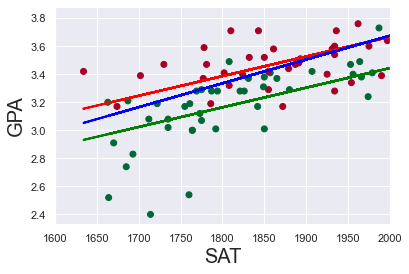

In [39]:
plt.scatter(data['SAT'],y, c = data['Attendence'], cmap = 'RdYlGn_r')
yhat_no = 0.0014*data['SAT'] + 0.6439
yhat_yes = 0.0014*data['SAT'] + 0.8665
yhat = 0.0017*data['SAT'] + 0.275
fig = plt.plot(x1,yhat_no, lw=2,c='green',label='Regression Line')
fig = plt.plot(x1,yhat_yes, lw=2,c='red',label='Regression Line')
fig = plt.plot(x1,yhat, lw=2,c='blue',label='Regression Line')
plt.xlabel('SAT',fontsize=20)
plt.ylabel('GPA',fontsize=20)
plt.xlim(1600,2000)
plt.show()

In [41]:
results.predict([1.0,1700,0])

array([3.02351312])

In [42]:
results.predict([1.0,1670,1])

array([3.20416316])